In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

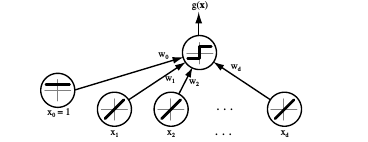

Fig.1: A simple linear classiﬁer having d input units, each corresponding to the values of the components of an input vector. Each input feature value xi is multiplied by its corresponding weight wi ; the output unit sums all these products and emits a +1 if wt x + w0 > 0 or a −1 otherwise.

## Multiple Discriminant Analysis (MDA) - Advanced Formulation

In Multiple Discriminant Analysis (MDA), we transform the data into a lower-dimensional subspace in order to maximize the separation between the classes. After the projection, the samples $ x_1, x_2, \dots, x_n $ project to a corresponding set of samples $ y_1, y_2, \dots, y_n $, and we can describe their mean vectors and scatter matrices in the new lower-dimensional space.

### 1. Projected Class-wise Mean and Scatter Matrices

For the projection $ y = W^T x $, the class-wise means and scatter matrices in the projected space are defined as:

- The **projected class mean** $ \tilde{m}_i $ for class $ i $ is:

$$
\tilde{m}_i = \frac{1}{n_i} \sum_{y \in Y_i} y
$$

- The **total projected mean** $ \tilde{m} $ is:

$$
\tilde{m} = \frac{1}{n} \sum_{i=1}^{c} n_i \tilde{m}_i
$$

The **within-class scatter matrix** in the projected space $ \tilde{S}_W $ is:

$$
\tilde{S}_W = \sum_{i=1}^{c} \sum_{y \in Y_i} (y - \tilde{m}_i)(y - \tilde{m}_i)^T
$$

The **between-class scatter matrix** in the projected space $ \tilde{S}_B $ is:

$$
\tilde{S}_B = \sum_{i=1}^{c} n_i (\tilde{m}_i - \tilde{m})(\tilde{m}_i - \tilde{m})^T
$$

### 2. Transformation of Scatter Matrices

By projecting the data to the lower-dimensional space, the within-class and between-class scatter matrices transform as:

$$
\tilde{S}_W = W^T S_W W
$$

$$
\tilde{S}_B = W^T S_B W
$$

These equations show how the scatter matrices $ S_W $ and $ S_B $ are transformed by the projection matrix $ W $.

### 3. Optimization Criterion

We aim to find a transformation matrix $ W $ that maximizes the ratio of the determinant of the between-class scatter matrix to the within-class scatter matrix:

$$
J(W) = \frac{|W^T S_B W|}{|W^T S_W W|}
$$

This criterion function $ J(W) $ seeks to maximize the separation between the classes while minimizing the within-class scatter in the projected space.

### 4. Generalized Eigenvalue Problem

To solve this problem, we need to find the eigenvectors and eigenvalues of the generalized eigenvalue problem:

$$
S_B W = \lambda S_W W
$$

Alternatively, this can be written as the characteristic polynomial:

$$
|S_B - \lambda_i S_W| = 0
$$

### 5. Key Observations

- Since $ S_B $ is the sum of $ c $ rank-1 matrices, the rank of $ S_B $ is at most $ c-1 $. Therefore, no more than $ c-1 $ eigenvalues will be non-zero.
- The solution matrix $ W $ contains the eigenvectors corresponding to the largest eigenvalues of the generalized eigenvalue problem.

If the within-class scatter matrix $ S_W $ is isotropic, the eigenvectors are simply the eigenvectors of $ S_B $, and the eigenvectors with non-zero eigenvalues span the space spanned by the vectors $ m_i - m $.

### 6. Non-Uniqueness of Solution

The solution for $ W $ is not unique. The transformation includes rotations and scalings of the axes in the lower-dimensional subspace. These transformations do not change the criterion function $ J(W) $ and, therefore, do not affect the final classification.

### 7. Visualizing the Projection

In the case of three classes, the data is projected onto a two-dimensional subspace, and the result can be visualized as shown in the figure below:

![Projection of 3D Distributions](figures/mda_projection.png)




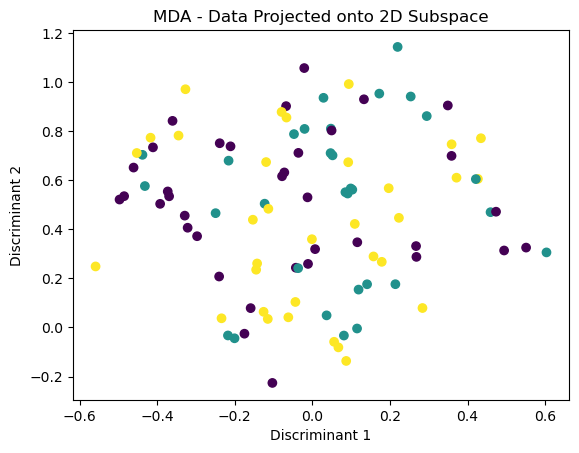

In [1]:
### 8. Python Code Implementation

#Here is an implementation of MDA in Python:

#```python
import numpy as np
from numpy.linalg import inv, eig
import matplotlib.pyplot as plt

def multiple_discriminant_analysis(X, y, num_classes):
    """
    Implements Multiple Discriminant Analysis (MDA) for dimensionality reduction.
    
    Parameters:
    X (ndarray): Data matrix of shape (n_samples, n_features).
    y (ndarray): Labels of shape (n_samples,) with integer class labels.
    num_classes (int): The number of classes (c).
    
    Returns:
    W (ndarray): The projection matrix of shape (n_features, c-1).
    X_projected (ndarray): The data projected onto the c-1 dimensional subspace.
    """
    # Compute class means
    n_samples, n_features = X.shape
    means = np.array([X[y == i].mean(axis=0) for i in range(num_classes)])

    # Compute the total mean
    m = X.mean(axis=0)

    # Compute the within-class scatter matrix (S_W)
    S_W = np.zeros((n_features, n_features))
    for i in range(num_classes):
        class_scatter = np.cov(X[y == i].T, bias=True)
        S_W += class_scatter * len(X[y == i])

    # Compute the between-class scatter matrix (S_B)
    S_B = np.zeros((n_features, n_features))
    for i in range(num_classes):
        n_i = len(X[y == i])
        diff = (means[i] - m).reshape(n_features, 1)
        S_B += n_i * diff @ diff.T

    # Solve the generalized eigenvalue problem S_B * w = lambda * S_W * w
    eigvals, eigvecs = eig(inv(S_W) @ S_B)
    
    # Sort the eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]

    # Select the top (c-1) eigenvectors to form the projection matrix
    W = eigvecs[:, :num_classes - 1]

    # Project the data onto the new subspace
    X_projected = X.dot(W)

    return W, X_projected

# Example usage
# Assume `X` is the dataset and `y` contains the class labels.
# For instance, in a 3-class problem (c=3) with data `X` of shape (n_samples, n_features):

num_classes = 3
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.choice([0, 1, 2], 100)  # Random class labels (3 classes)

W, X_projected = multiple_discriminant_analysis(X, y, num_classes)

# Plot the data projected onto the first 2 discriminant components (for 3 or more classes)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y)
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.title('MDA - Data Projected onto 2D Subspace')
plt.show()



## Linear Discriminant Functions and Multicategory Classifiers

### 1. Linear Decision Boundaries

A linear discriminant function divides the feature space into two decision regions $ R_1 $ and $ R_2 $, separated by a hyperplane $ H $. 

#### Key Properties:
- The hyperplane $ H $ is defined by:

$$
g(x) = w^T x + w_0 = 0
$$

- The feature space is divided into two half-spaces:
  - $ R_1 $ (where $ g(x) > 0 $)
  - $ R_2 $ (where $ g(x) < 0 $)

#### Geometry of the Decision Boundary:
- The vector $ w $ is normal (perpendicular) to the hyperplane $ H $.
- $ g(x) $ provides an algebraic measure of the distance from a point $ x $ to $ H $.

Express $ x $ as:

$$
x = x_p + r \frac{w}{\|w\|}
$$

where:
- $ x_p $ is the projection of $ x $ onto $ H $.
- $ r $ is the signed distance from $ x $ to $ H $.

Since $ g(x_p) = 0 $, it follows that:

$$
g(x) = w^T x + w_0 = r \|w\| \quad \text{or} \quad r = \frac{g(x)}{\|w\|}
$$

- The distance from the origin to $ H $ is given by:

$$
\frac{w_0}{\|w\|}
$$

- If $ w_0 > 0 $, the origin is on the positive side of $ H $.
- If $ w_0 < 0 $, the origin is on the negative side.

#### Visualization:
The linear decision boundary and regions $ R_1 $ and $ R_2 $ are illustrated in the figure below:

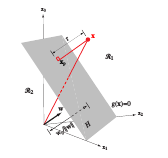

Fig.2: The linear decision boundary H, where g(x) = wt x + w0 = 0, separates the feature space into two half-spaces R1 (where g(x) > 0) and R2 (where g(x) < 0).

---

### 2. Multicategory Classification

For multicategory problems, the goal is to classify points into $ c $ categories using linear discriminant functions. Several approaches can be taken:

#### Approach 1: Pairwise Classifiers
- Solve $ c(c-1)/2 $ two-class problems, one for every pair of classes.
- Leads to regions where the classification may be undefined.

#### Approach 2: One-vs-Rest Classifiers
- Solve $ c-1 $ two-class problems, separating one class from the rest.
- Also prone to undefined regions.

#### Approach 3: Linear Machines
Define $ c $ linear discriminant functions:

$$
g_i(x) = w_i^T x + w_{i0}, \quad i = 1, \dots, c
$$

Assign $ x $ to class $ \omega_i $ if:

$$
g_i(x) > g_j(x) \quad \forall j \neq i
$$

In case of ties, the classification is undefined.

---

### 3. Properties of the Linear Machine

- The boundary between regions $ R_i $ and $ R_j $ is defined by the hyperplane $ H_{ij} $:

$$
g_i(x) = g_j(x) \quad \text{or} \quad (w_i - w_j)^T x + (w_{i0} - w_{j0}) = 0
$$

- The vector $ w_i - w_j $ is normal to $ H_{ij} $.
- The signed distance from $ x $ to $ H_{ij} $ is given by:

$$
\frac{g_i(x) - g_j(x)}{\|w_i - w_j\|}
$$

- The decision regions $ R_1, R_2, \dots, R_c $ are convex, limiting the flexibility of the classifier.
- The linear machine is most effective when the conditional densities $ p(x|\omega_i) $ are unimodal.

#### Visualization:
The decision boundaries and regions for a linear machine are shown in the figure below:

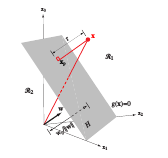

Fig.2: The linear decision boundary H, where g(x) = wt x + w0 = 0, separates the feature space into two half-spaces R1 (where g(x) > 0) and R2 (where g(x) < 0).

---

### Summary

- A **linear discriminant function** divides the feature space by a hyperplane, with the orientation determined by the normal vector $ w $ and the location by the bias $ w_0 $.
- The discriminant function $ g(x) $ measures the signed distance of $ x $ from the hyperplane:
  - $ g(x) > 0 $: $ x $ is on the positive side.
  - $ g(x) < 0 $: $ x $ is on the negative side.
- In the multicategory case:
  - A **linear machine** uses $ c $ discriminant functions to partition the feature space into $ c $ convex decision regions.
  - This approach is effective for problems where decision regions are well-separated and convex.


## Generalized Linear Discriminant Functions

## Linear Discriminant Function

The linear discriminant function $ g(x) $ can be written as:

$$
g(x) = w_0 + \sum_{i=1}^d w_i x_i,
$$

where the coefficients $ w_i $ are the components of the weight vector $ w $.

## Quadratic Discriminant Function

By adding additional terms involving the products of pairs of components of $ x $, we obtain the **quadratic discriminant function**:

$$
g(x) = w_0 + \sum_{i=1}^d w_i x_i + \sum_{i=1}^d \sum_{j=1}^d w_{ij} x_i x_j.
$$

Since $ x_i x_j = x_j x_i $, we can assume that $ w_{ij} = w_{ji} $ without loss of generality. Thus, the quadratic discriminant function has an additional $ \frac{d(d+1)}{2} $ coefficients at its disposal, enabling the creation of more complex separating surfaces.

The separating surface defined by $ g(x) = 0 $ is a second-degree or hyperquadric surface. The linear terms in $ g(x) $ can be eliminated by translating the axes.

### Symmetric Matrix Representation

We define $ W = [w_{ij}] $, a symmetric, nonsingular matrix. The basic character of the separating surface can be described in terms of the scaled matrix:

$$
\bar{W} = \frac{W}{w^T W^{-1} w - 4w_0}.
$$

- If $ \bar{W} $ is a positive multiple of the identity matrix, the separating surface is a **hypersphere**.
- If $ \bar{W} $ is positive definite, the separating surface is a **hyperellipsoid**.
- If some eigenvalues of $ \bar{W} $ are positive and others are negative, the surface is one of the various types of **hyperhyperboloids**.

### Higher-Order Polynomial Discriminants

By continuing to add terms like $ w_{ijk} x_i x_j x_k $, we obtain the class of **polynomial discriminant functions**. These can be considered truncated series expansions of some arbitrary $ g(x) $, leading to the **generalized linear discriminant function**:

$$
g(x) = \sum_{i=1}^{\hat{d}} a_i y_i(x),
$$

or equivalently:

$$
g(x) = a^T y,
$$

where:
- $ a $ is a $ \hat{d} $-dimensional weight vector,
- $ y_i(x) $ (sometimes called $ \phi $-functions) are arbitrary functions of $ x $.

### Mapping to a Higher-Dimensional Space

The $ \hat{d} $-functions $ y_i(x) $ map points in $ d $-dimensional $ x $-space to points in $ \hat{d} $-dimensional $ y $-space. The **homogeneous discriminant** $ a^T y = 0 $ separates points in this transformed space by a hyperplane passing through the origin.

### Example: Quadratic Discriminant

Let the quadratic discriminant function be:

$$
g(x) = a_1 + a_2 x + a_3 x^2,
$$

so that the three-dimensional vector $ y $ is given by:

$$
y = \begin{pmatrix}
1 \\
x \\
x^2
\end{pmatrix}.
$$

The mapping from $ x $ to $ y $ is illustrated geometrically. The data remain inherently one-dimensional because varying $ x $ causes $ y $ to trace out a curve in three dimensions.

### Degeneracy in Probability Density

If $ x $ follows a probability law $ p(x) $, the induced density $ \hat{p}(y) $ will be degenerate, being zero everywhere except on the curve, where it becomes infinite. This issue arises whenever $ \hat{d} > d $, and the mapping projects points from a lower-dimensional space to a higher-dimensional space.

### Decision Regions

The plane $ \hat{H} $ defined by $ a^T y = 0 $ divides the $ y $-space into two decision regions $ \hat{R}_1 $ and $ \hat{R}_2 $. The corresponding decision regions in the original $ x $-space are determined by the mapping.

An example quadratic discriminant function:

$$
g(x) = -1 + x + 2x^2,
$$

produces a decision boundary separating the two regions in the transformed space and their respective mappings in the original space.

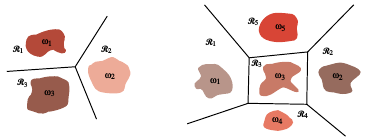

Fig.4: Decision boundaries produced by a linear machine for a three-class prob- lem and a ﬁve-class problem.

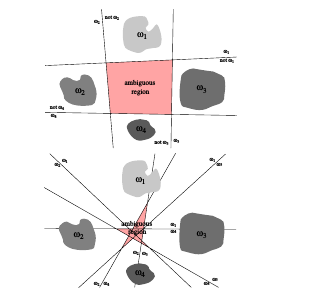

Fig.3: Linear decision boundaries for a four-class problem. The top ﬁgure shows ωi /not ωi dichotomies while the bottom ﬁgure shows ωi /ωj dichotomies. The pink regions have ambiguous category assigments.


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: The following kwargs were not used by contour: 'label'
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: The following kwargs were not used by contour: 'label'


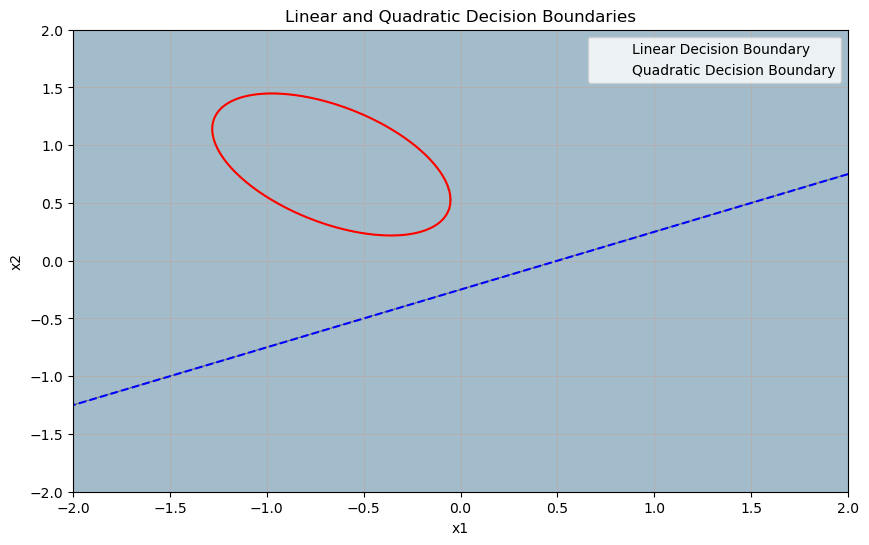

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Discriminant Function
def linear_discriminant(x, w, w0):
    """
    Linear discriminant function g(x) = w^T x + w0
    """
    x = np.array(x)  # Ensure x is a NumPy array
    return np.dot(w, x) + w0

# Quadratic Discriminant Function
def quadratic_discriminant(x, w, w_matrix, w0):
    """
    Quadratic discriminant function g(x) = w0 + w^T x + x^T W x
    """
    x = np.array(x)  # Ensure x is a NumPy array
    return w0 + np.dot(w, x) + np.dot(np.dot(x.T, w_matrix), x)

# Set up example parameters for plotting
w = np.array([1, -2])             # Weight vector for linear discriminant
w0 = -0.5                        # Bias term for linear discriminant

w_quad = np.array([0.5, -1])      # Weight vector for quadratic discriminant
w_matrix = np.array([[1, 0.5],    # Quadratic weight matrix (symmetric)
                     [0.5, 1]])
w0_quad = 0.3                    # Bias term for quadratic discriminant

# Create a grid of points in 2D space
x_range = y_range = np.linspace(-2, 2, 500)
X, Y = np.meshgrid(x_range, y_range)

# Evaluate discriminants on the grid
Z_linear = np.array([linear_discriminant(np.array([x, y]), w, w0) for x, y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
Z_quadratic = np.array([quadratic_discriminant(np.array([x, y]), w_quad, w_matrix, w0_quad) for x, y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))

# Linear discriminant plot
plt.contour(X, Y, Z_linear, levels=[0], colors='blue', linestyles='dashed', label="Linear Decision Boundary")
plt.contourf(X, Y, Z_linear > 0, alpha=0.2, colors=["blue", "orange"])
plt.title("Linear and Quadratic Decision Boundaries")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)

# Quadratic discriminant plot
plt.contour(X, Y, Z_quadratic, levels=[0], colors='red', linestyles='solid', label="Quadratic Decision Boundary")
plt.contourf(X, Y, Z_quadratic > 0, alpha=0.2, colors=["green", "yellow"])

# Add legend and show
plt.legend(["Linear Decision Boundary", "Quadratic Decision Boundary"])
plt.show()


## Generalized Linear Discriminant Function and Mappings

In this section, we explore the concept of mapping from input space $ x $ to a higher-dimensional feature space $ y $, allowing us to transform linear decision surfaces into more complex forms such as parabolas, hyperboloids, or other shapes in the input space. Below is the mathematical explanation along with visualizations.

## Quadratic Discriminant Function Mapping

The quadratic discriminant function is expressed as:

$$
g(x) = w_0 + \sum_{i=1}^d w_i x_i + \sum_{i=1}^d \sum_{j=1}^d w_{ij} x_i x_j
$$

where:
- $ x $ is the input vector,
- $ w $ is the weight vector for linear terms,
- $ W $ is the symmetric weight matrix for quadratic terms,
- $ w_0 $ is the bias term.

### Mapping $ x $ to Augmented Space $ y $
We define the augmented feature vector $ y $ as:
$$
y = \begin{bmatrix} 1 \\ x_1 \\ x_2 \\ x_1^2 \\ x_1 x_2 \\ x_2^2 \end{bmatrix}
$$

Using this, $ g(x) $ can be rewritten as:
$$
g(x) = \mathbf{a}^T \mathbf{y}
$$

where $ \mathbf{a} $ is the augmented weight vector incorporating $ w_0 $, $ w $, and elements from $ W $.

## Visualizing the Mapping

To illustrate, consider the mapping of a one-dimensional input space $ x $ to a three-dimensional feature space $ y = \begin{bmatrix} 1 \\ x \\ x^2 \end{bmatrix} $. The decision boundary in $ y $-space is a plane, and its projection back to $ x $-space is a parabola.

$$
\text{Positive Region: } g(x) > 0
$$
$$
\text{Negative Region: } g(x) < 0
$$

### Example: Decision Surface Mapping

Suppose the decision surface in $ y $-space is defined by:
$$
a_0 y_0 + a_1 y_1 + a_2 y_2 = 0
$$
This translates to a quadratic decision boundary in $ x $-space.

---

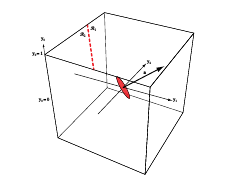

Fig.7: A three-dimensional augmented feature space y and augmented weight vector a (at the origin). The set of points for which at y = 0 is a plane (or more generally, a hyperplane) perpendicular to a and passing through the origin of y- space, as indicated by the red disk. Such a plane need not pass through the origin of the two-dimensional x-space at the top, of course, as shown by the dashed line. Thus there exists an augmented weight vector a that will lead to any straight decision line in x-space.


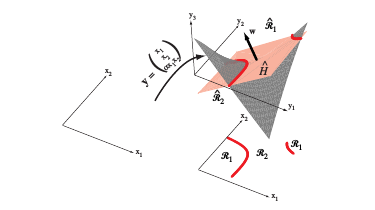

Fig.6: The two-dimensional input space x is mapped through a polynomial function f to y. Here the mapping is y1 = x1 , y2 = x2 and y3 ∝ x1 x2 . A linear discriminant in this transformed space is a hyperplane, which cuts the surface. Points to the positive side of the hyperplane Ĥ correspond to category ω1 , and those beneath it ω2 . Here, in terms of the x space, R1 is a not simply connected.


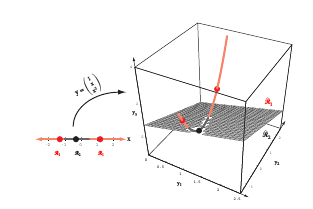

Fig.5: The mapping y = (1, x, x2 )t takes a line and transforms it to a parabola in three dimensions. A plane splits the resulting y space into regions corresponding to two categories, and this in turn gives a non-simply connected decision region in the one-dimensional x space.

In [ ]:
## Implementation in Python

#Below is a Python implementation of the quadratic mapping and visualization:

#```python
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic mapping function
def map_to_quadratic(x):
    """Maps a scalar input x to the quadratic feature space."""
    return np.array([1, x, x**2])

# Define augmented weight vector
a = np.array([-1, 1, 2])  # Corresponding to g(x) = -1 + x + 2x^2

# Generate data points
x = np.linspace(-2, 2, 500)
y_mapped = np.array([map_to_quadratic(val) for val in x])
g_values = y_mapped @ a  # Compute g(x) = a^T y

# Plot results
plt.figure(figsize=(10, 6))

# Decision boundary in x-space
plt.plot(x, g_values, label="Decision Boundary: $g(x)$", color="red")

# Highlight positive and negative regions
plt.fill_between(x, g_values, where=(g_values > 0), color="blue", alpha=0.2, label="$g(x) > 0$")
plt.fill_between(x, g_values, where=(g_values < 0), color="orange", alpha=0.2, label="$g(x) < 0$")

plt.axhline(0, color="black", linestyle="--", linewidth=0.8)  # Zero line
plt.title("Quadratic Mapping and Decision Surface")
plt.xlabel("x")
plt.ylabel("$g(x)$")
plt.legend()
plt.grid()
plt.show()


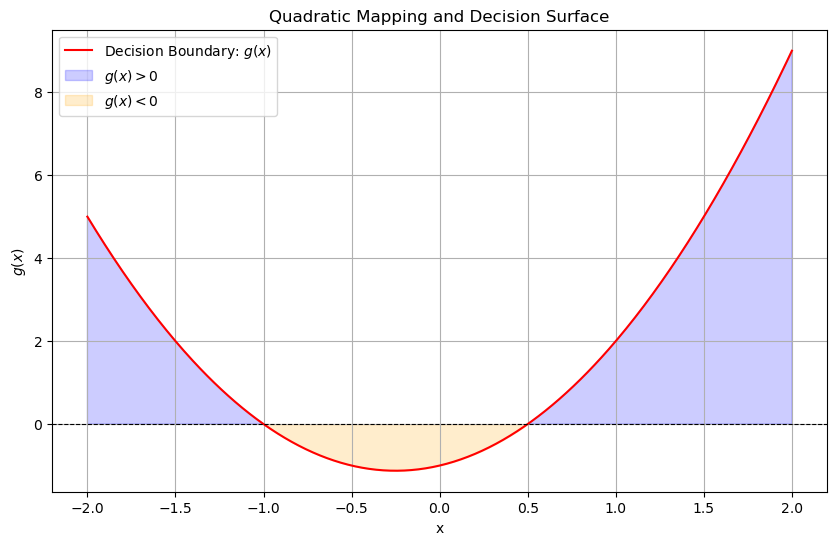

In [7]:
import matplotlib.pyplot as plt

# Define the quadratic mapping function
def map_to_quadratic(x):
    """Maps a scalar input x to the quadratic feature space."""
    return [1, x, x**2]  # Augmented feature vector

# Define the augmented weight vector
a = [-1, 1, 2]  # Corresponding to g(x) = -1 + x + 2x^2

# Function to compute g(x) = a^T y
def compute_g(x):
    y = map_to_quadratic(x)
    g = 0
    for ai, yi in zip(a, y):
        g += ai * yi
    return g

# Generate data points
x_values = [i * 0.01 for i in range(-200, 201)]  # Range from -2 to 2 with step size 0.01
g_values = [compute_g(x) for x in x_values]

# Plot results
plt.figure(figsize=(10, 6))

# Plot decision boundary
plt.plot(x_values, g_values, label="Decision Boundary: $g(x)$", color="red")

# Highlight positive and negative regions
plt.fill_between(
    x_values, g_values, where=[g > 0 for g in g_values],
    color="blue", alpha=0.2, label="$g(x) > 0$"
)
plt.fill_between(
    x_values, g_values, where=[g < 0 for g in g_values],
    color="orange", alpha=0.2, label="$g(x) < 0$"
)

plt.axhline(0, color="black", linestyle="--", linewidth=0.8)  # Zero line
plt.title("Quadratic Mapping and Decision Surface")
plt.xlabel("x")
plt.ylabel("$g(x)$")
plt.legend()
plt.grid()
plt.show()
